In [188]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 32})
# sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 15, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())




'2018-01-10 15:59:15.433317'

In [2]:
RCP8_IPSL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/T_only_RCP8_IPSL.mat')
RCP4_IPSL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/T_only_RCP4_IPSL.mat')
RCP8_GFDL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/T_only_RCP8_GFDL.mat')
RCP4_GFDL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/T_only_RCP4_GFDL.mat')

In [3]:
hist_20y_plotter = ResultsPlotter(f='../IO/airT_Scenarios/T_only_full_scen_base_historical_20y.mat')

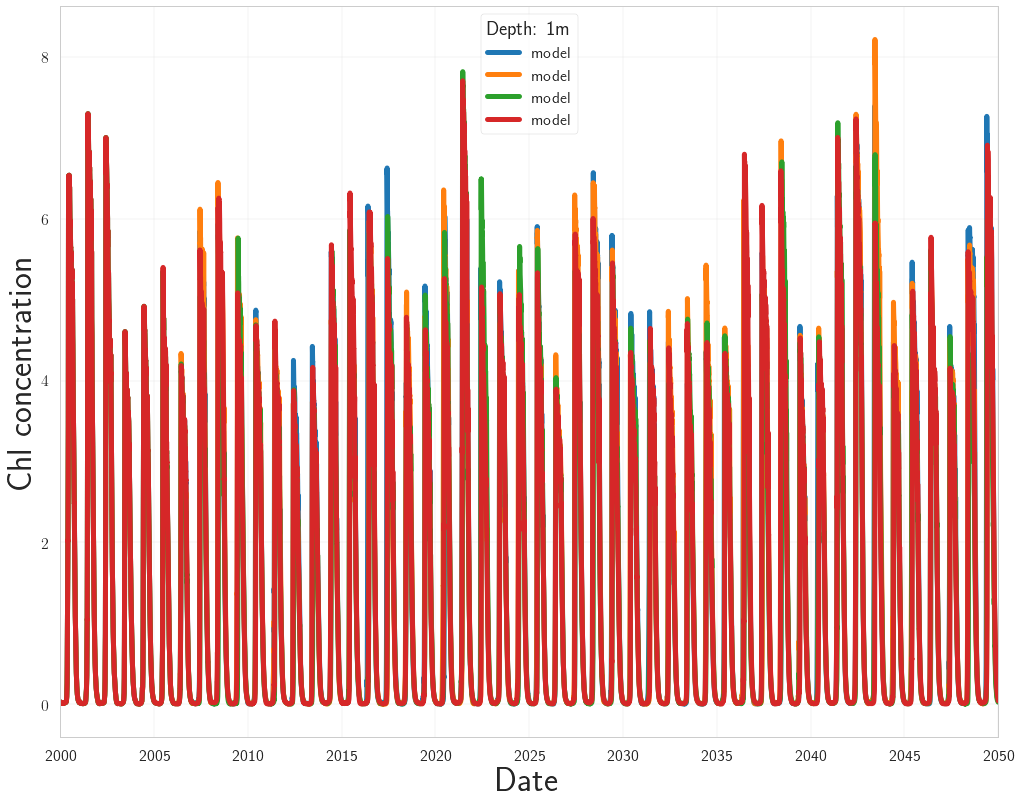

In [4]:
start_date = '2000-01-01'
end_date = '2050-01-01'
ax = RCP8_IPSL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)
ax = RCP4_IPSL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)
ax = RCP8_GFDL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)
ax = RCP4_GFDL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)



In [27]:
import scenarios_plots as sp

In [32]:
%reload_ext scenarios_plots

In [31]:
%load_ext autoreload
%autoreload 2

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

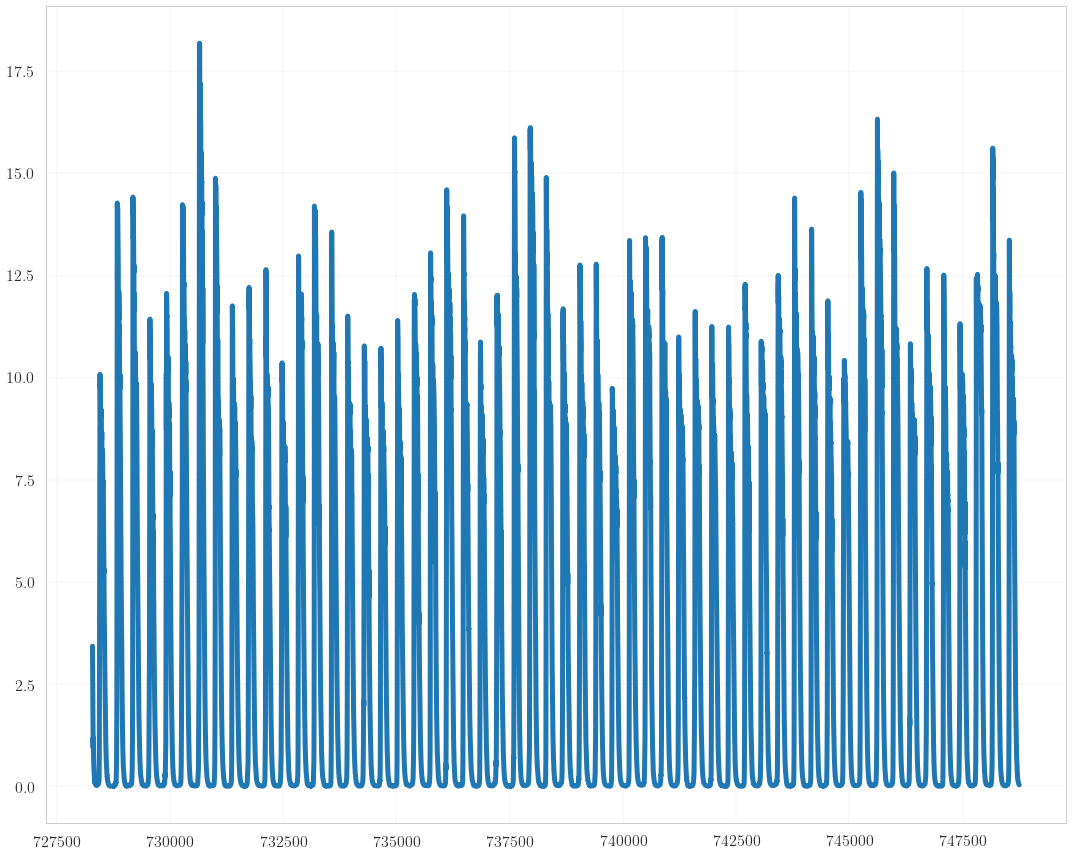

In [189]:
start_date = '2049-05-01'
end_date = '2049-07-01'
lw=5
ax = sp.plot_wc(RCP8_IPSL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP8 IPSL', lw=lw)
ax = sp.plot_wc(RCP4_IPSL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP4 IPSL', lw=lw)
ax = sp.plot_wc(RCP8_GFDL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP8 GFDL', lw=lw)
ax = sp.plot_wc(RCP4_GFDL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP4 GFDL', lw=lw)
ax = sp.plot_wc(hist_20y_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='Hist, 20y cycle', c='k', linestyle='-.', lw=5)




In [21]:
results = RCP8_IPSL_plotter.env_getter('water')
d = 4
e = 'Chl'

ice_thickness = results['His'][0, 0][0, :]

inx = np.where(results['z'][0, 0] == d)[0][0]
results['concentrations'][0, 0][e][0, 0][inx, :]


array([ 0.00635691,  0.00624389,  0.00601145, ...,  0.03130908,
        0.03005978,  0.02876232])

In [59]:
from scenarios_plots import get_data_wc

In [22]:
RCP8_IPSL_res = pd.DataFrame()

In [79]:
days, Phy = get_data_wc(RCP8_IPSL_plotter, ['Chl', 'C'], 4)

In [80]:
len(days)

20454

In [81]:
len(Phy)

20454

In [113]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']):
    Phy[n] = get_data_wc(res, ['Chl', 'C'], 4)[1]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear

Text(0.5,1,'2040-2050 Mean Phy')

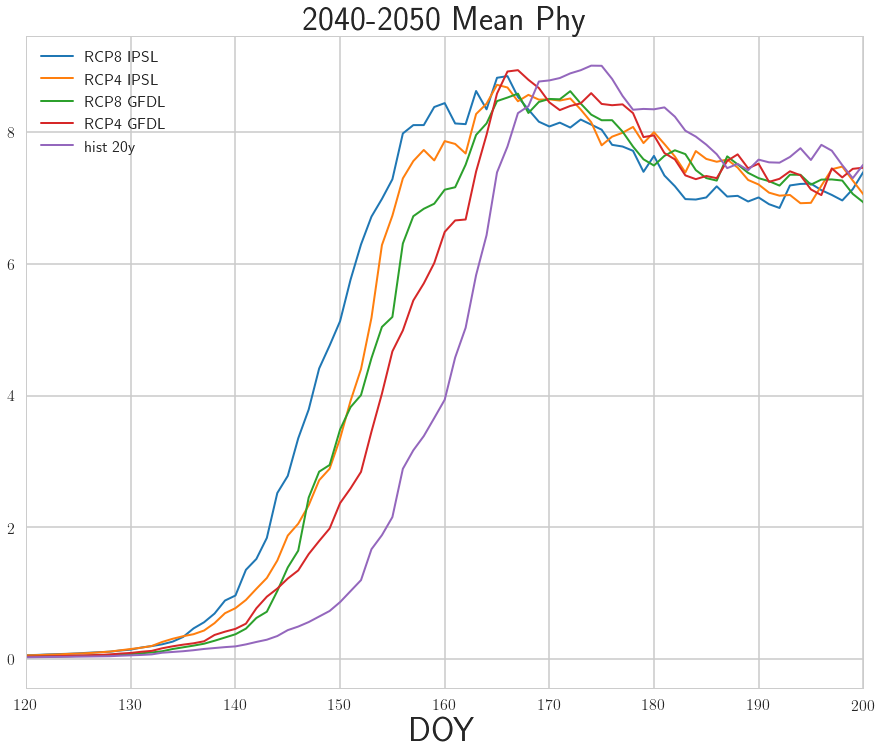

In [117]:
columns = ['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']
Phy[-365*10:].groupby(['DOY']).mean()[columns].plot()
plt.xlim(120,200)
plt.title('2040-2050 Mean Phy')

In [116]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']):
    Ice[n] = res.env_getter('water')['His'][0, 0][0, :]
    
Ice['Year'] = Ice.Date.dt.year
Ice['Month'] = Ice.Date.dt.month
Ice['Day'] = Ice.Date.dt.day
Ice['DOY'] = Ice.Date.dt.dayofyear

In [167]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']):
    P_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['PO4'][0][0][0]
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear

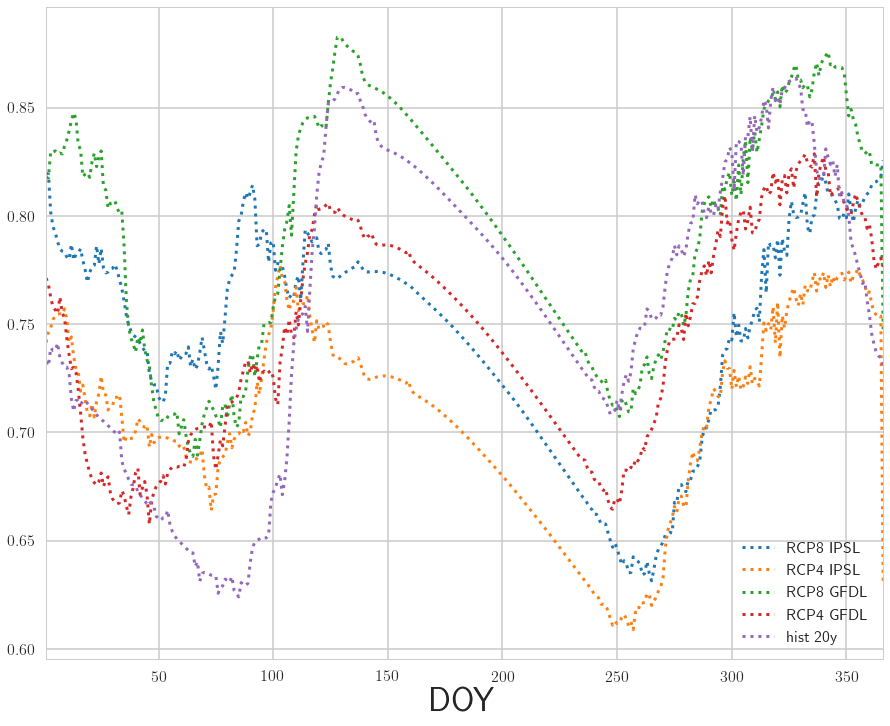

In [173]:
columns = ['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']
P_fx[-365*10:].groupby(['DOY']).mean()[columns].plot(linestyle=':', lw=3)

Text(0.5,1,'2040-2050 Mean Ice thickness')

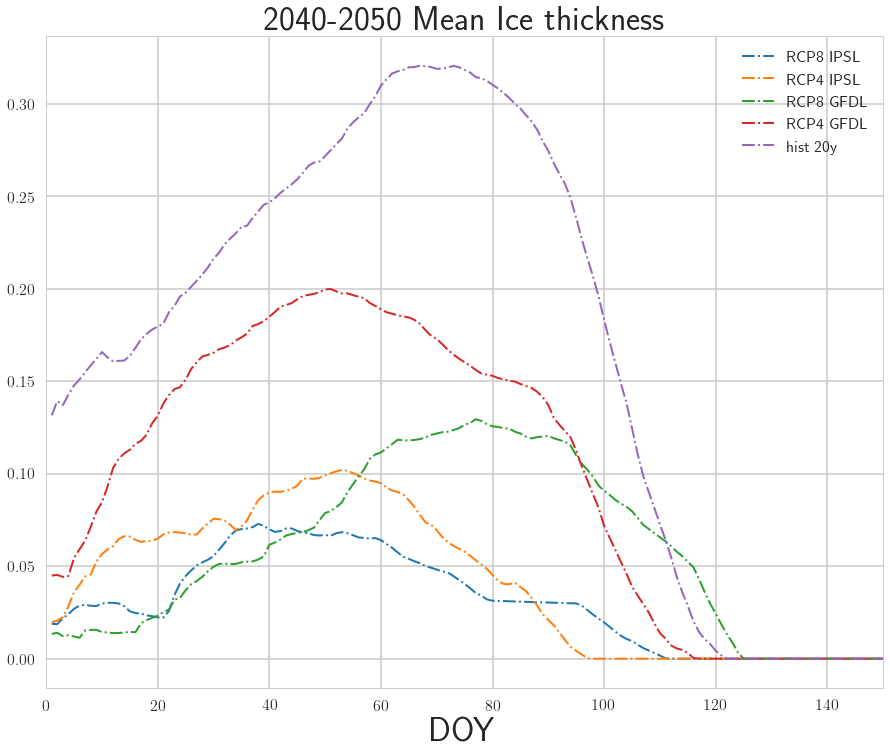

In [190]:
columns = ['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']
Ice[-365*10:].groupby(['DOY']).mean()[columns].plot(linestyle='-.')
plt.xlim(0,150)
plt.title('2040-2050 Mean Ice thickness')

(0, 365)

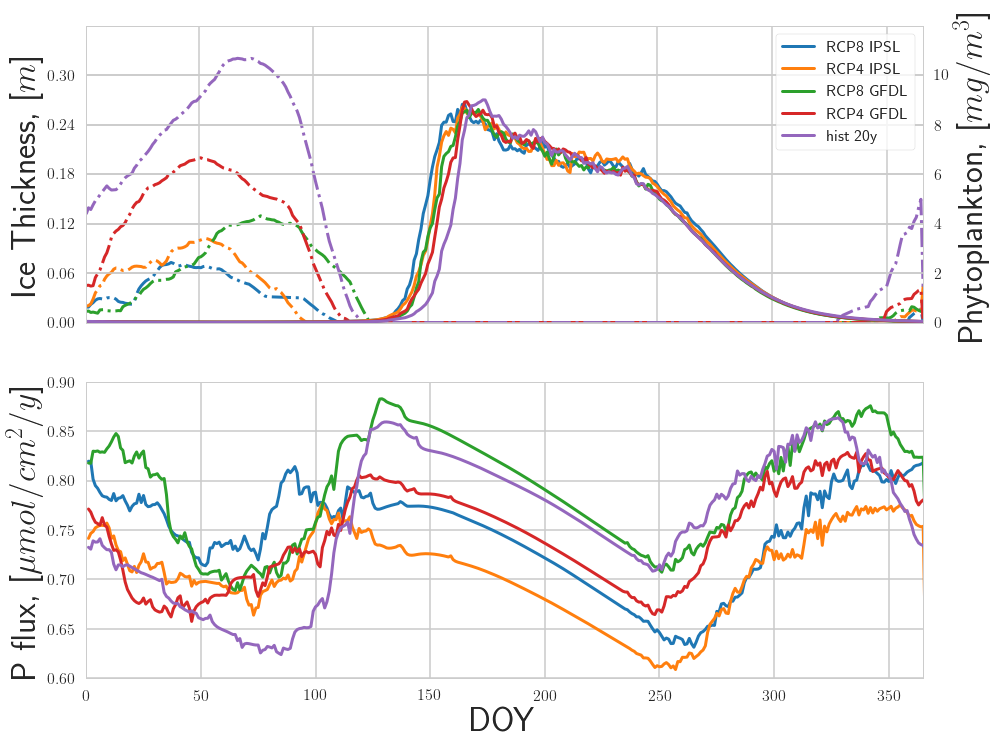

In [195]:
columns = ['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']

ax0 = plt.subplot(211)
ax1 = ax0.twinx()

ax1.set_ylim(0,12)
ax0.set_ylim(0,0.36)


Phy[-365*10:].groupby(['DOY']).mean()[columns].plot(ax=ax1, lw=3)
Ice[-365*10:].groupby(['DOY']).mean()[columns].plot(linestyle='-.', ax=ax0, lw=3)

ax1.set_yticks(np.arange(0, 12, 1.0*2))
ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Ice Thickness, [$m$]')
ax1.set_ylabel('Phytoplankton, [$mg/m^3$]')

ax0.set_xlabel('Day of the year')
ax1.legend(frameon=1)

ax2 = plt.subplot(212)
P_fx[-365*10:].groupby(['DOY']).mean()[columns].plot(linestyle='-', lw=3, ax=ax2)
ax2.legend_.remove()
ax2.set_ylabel('P flux, [$\mu mol/cm^2/y$]')
ax2.set_ylim(0.6, 0.9)

plt.xlim(0,365)
# plt.title('2040-2050 Mean Phy')

In [196]:
from numpy import trapz

In [202]:
columns

['RCP8 IPSL', 'RCP4 IPSL', 'RCP8 GFDL', 'RCP4 GFDL', 'hist 20y']

In [226]:
p_int_yearly = []
ice_int_yearly = []
for y in np.arange(1995, 2051):
    for scen in columns:
        p_int_yearly.append(trapz(P_fx[P_fx.Year==y][scen], dx=1./365))
        ice_int_yearly.append(trapz(Ice[Ice.Year==y][scen], dx=1./365))

In [208]:
p_int_yearly = []
ice_int_yearly = []

for scen in columns:
    p_int_yearly.append(trapz(P_fx[-365*30:].groupby(['DOY']).mean()[scen], dx=1./365))

for scen in columns:
    ice_int_yearly.append(trapz(Ice[-365*30:].groupby(['DOY']).mean()[scen], dx=1./365))

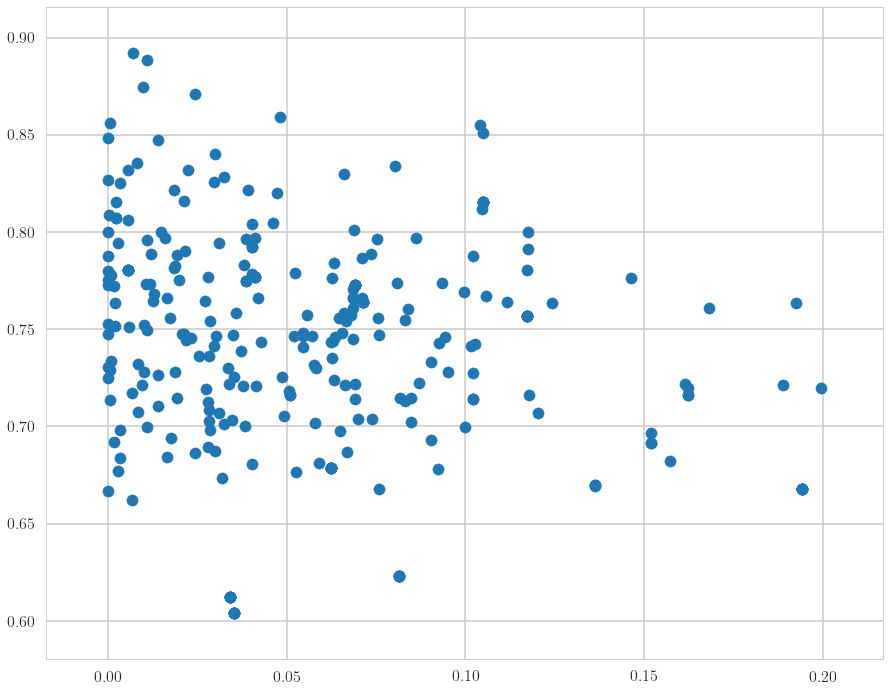

In [227]:
plt.scatter(ice_int_yearly, p_int_yearly)

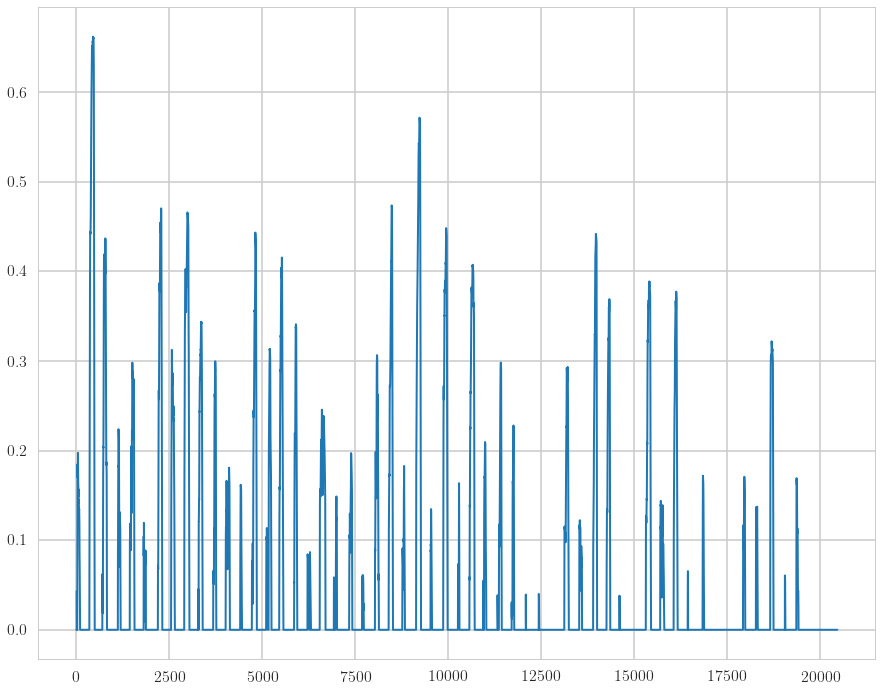

In [18]:
plt.plot(ice_thickness)